
# Разминка

Дан обучающий сет, про него известно, что:
- все признаки являются бинарными (0 или 1)
- большая часть признаков является шумом,
- целевая функция $f: \mathbb{Z}_2^{100} -> \mathbb{Z}_2$  линейная.

Требуется найти целевую функцию.

Решение будет зачтено, если будет точно предсказано значение функции на каждом тестовом наборе.

## Формат ввода

Обучающий датасет `train.tsv`: в каждой строке содержатся значения 100 признаков, 101-ое число в каждой строке — значение целевой функции на этом наборе.

Тестовый датасет `test.tsv`: в каждой строке содержатся значения 100 признаков.

## Формат вывода

Необходимо предоставить файл answer.tsv, в котором в i-той строке будет записано предсказанное значение функции (0 или 1) для i-той строки тестового датасета.

In [39]:
%matplotlib inline
from jupyterthemes import jtplot
jtplot.style()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as plt
import seaborn as sn

In [20]:
data = pd.read_table('train.tsv', header=None)
target = data.loc[:,100]
train = data.drop(100, axis=1)
test = pd.read_table('test.tsv', header=None)
test.shape

(1000, 100)

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression

In [24]:
kfold = 5
train_trn, test_trn, train_tgt, test_tgt = train_test_split(train, target,
                                                            test_size=0.25, random_state=42)
train_trn.shape, test_trn.shape, train_tgt.shape, test_tgt.shape

((7500, 100), (2500, 100), (7500,), (2500,))

In [25]:

model_lr = LogisticRegression()

In [43]:
tols = np.arange(.01, .99, .01)
scores = []
for tol in tols:
    model_lr = LogisticRegression(penalty='l1', tol=tol)
    score1 = cross_val_score(model_lr, train, target, cv=kfold)
    scores.append(score1.mean())

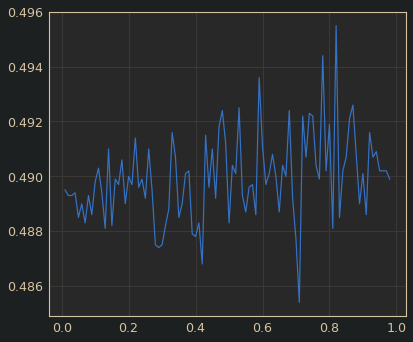

In [46]:
#pl.clf()
#plt.figure()
plt.plot(tols, scores)
#pl.show()

In [54]:
tols = [1e-6]
while tols[-1] < 1e-2:  tols.append(tols[-1] * 2)
print(len(tols))
scores = []
for tol in tols:
    model_lr = LogisticRegression(penalty='l1', tol=tol)
    score1 = cross_val_score(model_lr, train, target, cv=kfold)
    scores.append(score1.mean())

15


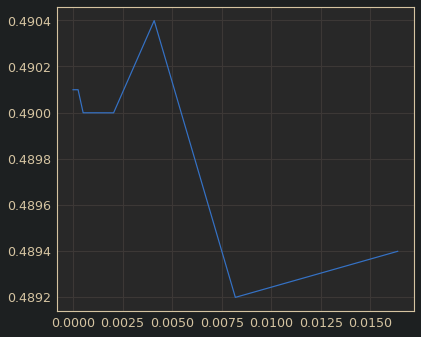

In [55]:
plt.plot(tols, scores)

In [56]:
model_lr = LogisticRegression()
score1 = cross_val_score(model_lr, train, target, cv=kfold)
score1.mean()

0.4908991983497996

In [71]:
lr = LogisticRegression()
lr.fit(train, target)
df = pd.DataFrame(lr.predict(test))
df.to_csv('result.tsv', sep='\t', header=False, index=False)
!head -5 result.tsv
!cp -v result.tsv ../../abyss

0
0
1
0
0
'result.tsv' -> '../../abyss/result.tsv'


In [66]:
%%bash
ls *.tsv
cp -v result.tsv ../../abyss
ls ../../abyss

result.tsv
test.tsv
train.tsv
'result.tsv' -> '../../abyss/result.tsv'
result.tsv
test.tsv
Thumbs.db
train.tsv
vm-dock1.dev_alwaysup.xml
